<a href="https://colab.research.google.com/github/zachzander/object_detection/blob/main/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d christianvorhemus/industrial-quality-control-of-packages

industrial-quality-control-of-packages.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/industrial-quality-control-of-packages.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!mkdir datasets && cd datasets && mkdir damaged && cd damaged

mkdir: cannot create directory ‘datasets’: File exists


In [ ]:
!cp -r "/content/damaged/side" "/content/datasets/damaged"

In [ ]:
!mkdir /content/datasets/intact && cd intact

mkdir: cannot create directory ‘/content/datasets/intact’: File exists


In [ ]:
!cp -r  "/content/datasets/intact""/content/intact/side"

cp: missing destination file operand after '/content/datasets/intact/content/intact/side'
Try 'cp --help' for more information.


In [ ]:
import numpy as np
import cv2
import pickle
import os
import matplotlib.pyplot as plt
import random


In [ ]:
directory=r'/content/datasets'
categ=['intact/side','damaged/side']

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [ ]:
model = ResNet50(weights='imagenet')


/content/datasets/intact/side/0733749723896_side.png
/content/datasets/damaged/side/0950606566689_side.png


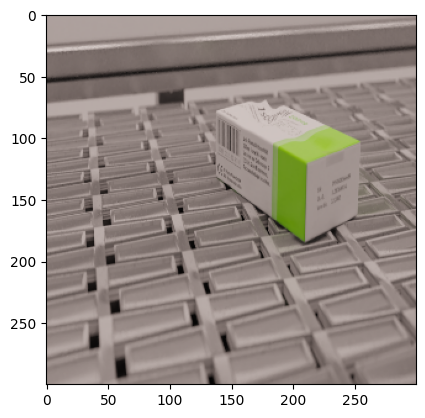

In [ ]:
img_size=300
data=[]
for cate in categ:
    folder=os.path.join(directory,cate)
    #print(folder)
    label=categ.index(cate)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        print(img_path)
#         break;
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
        plt.imshow(img_arr)
        break;

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.9487 - accuracy: 0.0000e+00 - val_loss: 11.1677 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 667ms/step - loss: 1.3113e-06 - accuracy: 1.0000 - val_loss: 17.6239 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 663ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 22.2000 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 25.8556 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 28.9585 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 31.6618 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 644ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 34.0

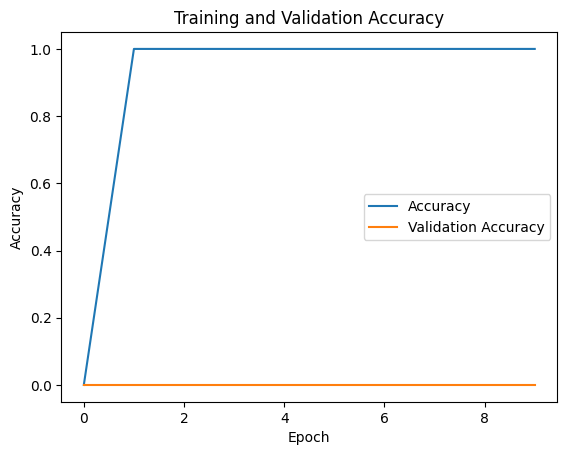

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Preprocessed data
train_images = np.array([item[0] for item in data])
train_labels = np.array([item[1] for item in data])


# Load ResNet50 without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Output layer with 2 classes: damaged or undamaged

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




In [ ]:
def load_prep(filename, img_shape=300):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255
  return img

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
def prep_and_plot(model,filename,classs):
  img=load_prep(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=classs[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

--2024-04-30 04:44:31--  https://t4.ftcdn.net/jpg/03/33/88/47/360_F_333884700_LXcmVMFWJFzXskQIGIxfgxLPtHFWPf1a.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34828 (34K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  34.01K  --.-KB/s    in 0.005s  

2024-04-30 04:44:31 (7.28 MB/s) - ‘img.jpg’ saved [34828/34828]

1/1 [==============================] - 2s 2s/step


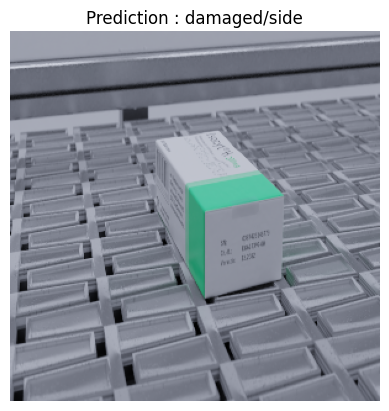

In [ ]:
!wget -O img.jpg https://t4.ftcdn.net/jpg/03/33/88/47/360_F_333884700_LXcmVMFWJFzXskQIGIxfgxLPtHFWPf1a.jpg
prep_and_plot(model,'/content/datasets/intact/side/0387423146773_side.png', categ)

1/1 [==============================] - 2s 2s/step


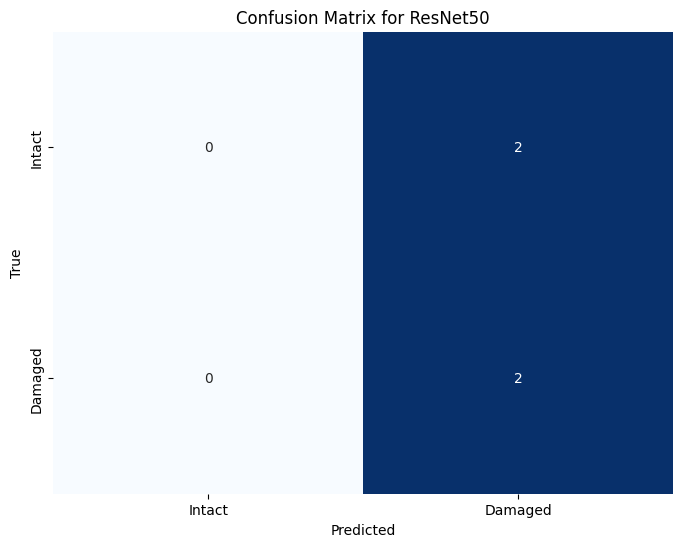

In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load pre-trained ResNet50 model
def load_resnet_model(input_shape=(224, 224, 3), num_classes=2):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to preprocess image
def preprocess_image(img_path, target_size=(224, 224)):
    image = cv2.imread(img_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image

# Load ResNet model
model = load_resnet_model()

# Load and preprocess four images
img_paths = ['/content/datasets/damaged/side/0448437998906_side.png',
             '/content/datasets/damaged/side/0129768769736_side.png',
             '/content/datasets/intact/side/0529291161632_side.png',
             '/content/datasets/intact/side/0296036278729_side.png']

X_test = [preprocess_image(img_path) for img_path in img_paths]

# Define true labels
true_labels = [1, 1, 0, 0]  # 0 for intact, 1 for damaged

# Predict labels
predictions = model.predict(np.array(X_test))
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Intact', 'Damaged'],
            yticklabels=['Intact', 'Damaged'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ResNet50')
plt.show()


Epoch 1/10
2/2 [==============================] - 7s 2s/step - loss: 0.8653 - accuracy: 0.6667 - val_loss: 1.8106 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 1s 538ms/step - loss: 0.7412 - accuracy: 0.6667 - val_loss: 1.4863 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 1s 536ms/step - loss: 0.6661 - accuracy: 0.6667 - val_loss: 1.3392 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 1s 398ms/step - loss: 0.6271 - accuracy: 0.6667 - val_loss: 1.1288 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 395ms/step - loss: 0.6611 - accuracy: 0.6667 - val_loss: 0.9239 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 1s 539ms/step - loss: 0.6608 - accuracy: 0.6667 - val_loss: 0.8312 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 1s 532ms/step - loss: 0.6633 - accuracy: 0.6667 - val_loss: 0.8202 - val_accuracy: 0.0000

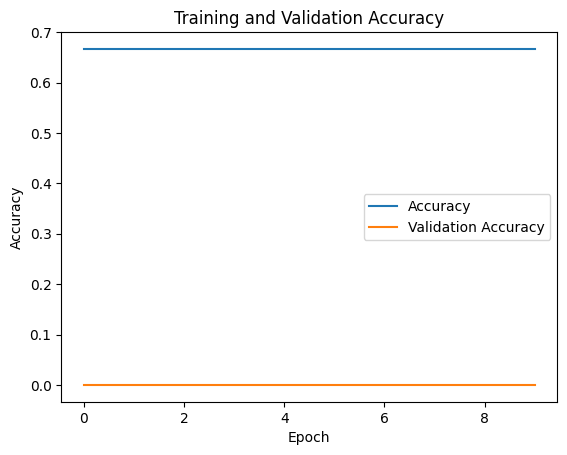

In [ ]:
num_classes = 2
labels = np.array(labels)
one_hot_labels = np.zeros((len(labels), num_classes))
for i, label in enumerate(labels):
    one_hot_labels[i, label] = 1

# Preprocess images
X = np.array([preprocess_image(img_path) for img_path in img_paths])

# Train the model
history = model.fit(X, one_hot_labels, epochs=10, batch_size=2, validation_split=0.2)

# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()